## Obama Approval Example - beta conjugacy

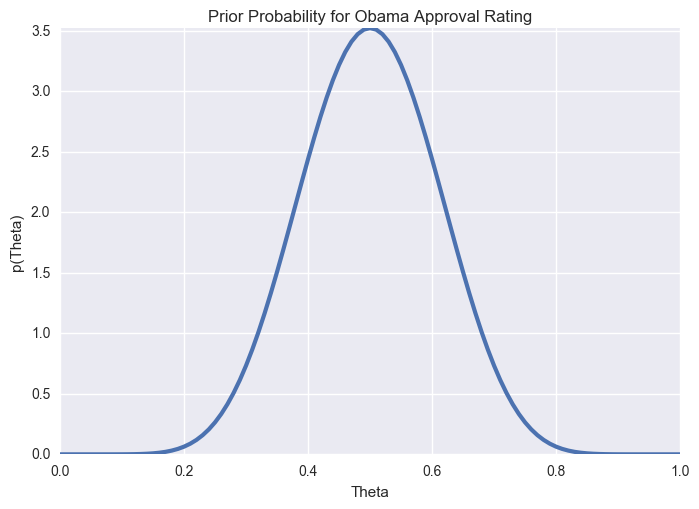

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

n = 50
n_approve = 29
alpha = 10
beta = 10

x_theta = np.linspace(0, 1, 101)
p_theta = stats.beta(alpha, beta).pdf(x_theta)

plt.plot(x_theta, p_theta, linewidth=3.)
plt.ylim([0, max(p_theta)])
plt.xlabel("Theta")
plt.ylabel("p(Theta)")
plt.title("Prior Probability for Obama Approval Rating");

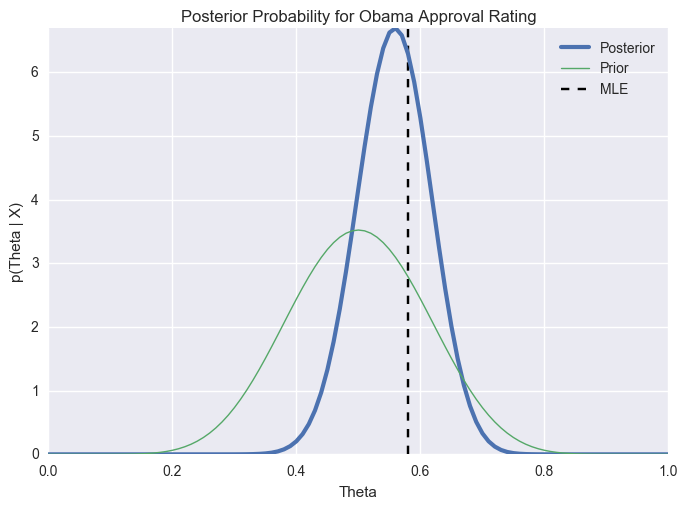

In [2]:
alpha_post = alpha + n_approve
beta_post = n - n_approve + beta
post_theta = stats.beta(alpha_post, beta_post).pdf(x_theta)

fig, ax = plt.subplots()
ax.plot(x_theta, post_theta, linewidth=3., label='Posterior')
ax.plot(x_theta, p_theta, linewidth=1., label='Prior')
ax.set_ylim([0, max(post_theta)])
ax.set_xlabel("Theta")
ax.set_ylabel("p(Theta | X)")
ax.set_title("Posterior Probability for Obama Approval Rating")
ax.vlines(x=n_approve / n, ymin=0, ymax=max(post_theta), linestyle='--', label="MLE")
ax.legend();

In [3]:
import pymc3 as pm

with pm.Model() as model:
    theta = pm.Beta('theta', alpha, beta)
#    theta = pm.Normal('theta', 0.5, 1.0)
#    theta = pm.Uniform('theta', 0, 1)    
#    theta = pm.Uniform('theta', 0, 0.5)
    
    X = pm.Binomial('X', n, theta, observed=n_approve)

Applied logodds-transform to theta and added transformed theta_logodds_ to model.


In [4]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(50000, step=step, njobs=1)

100%|██████████| 50000/50000 [00:03<00:00, 16281.79it/s]


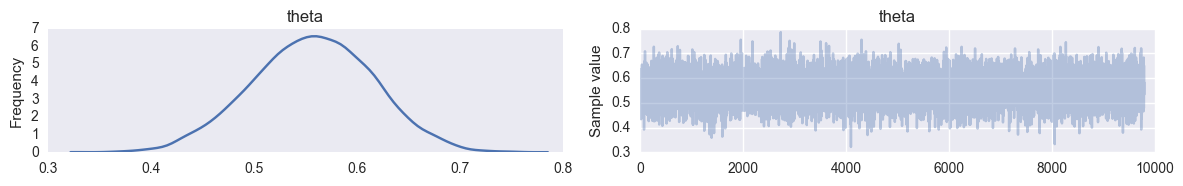

In [5]:
pm.traceplot(trace[1000:][::5]);

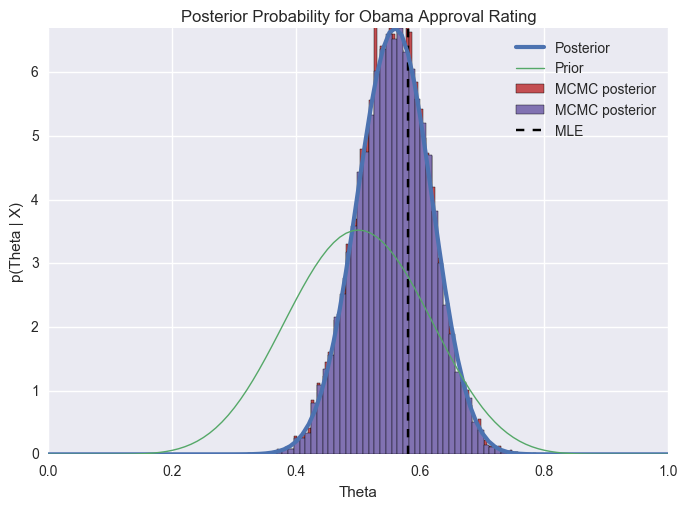

In [7]:
ax.hist(trace['theta'][1000:][::5], bins=50, normed=True, label='MCMC posterior')
ax.legend()
fig